In [2]:
# Load libraries

# Function and modules for data preparation and visualization
import datetime
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from pandas_datareader import data as pdr
import yfinance as yf

  
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns

from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns

# Function and modules for data analysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Function and modules for the supervised regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

import statsmodels.api as sm

from pickle import dump
from pickle import load

# Time series models
from statsmodels.tsa.arima.model import ARIMA
#from statsmodels.tsa.statespace.sarimax import SARIMAX

# Error metrics
from sklearn.metrics import mean_squared_error


# Feature selection and model evaluation
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

# Plotting 
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf

In [3]:
# 2.2 데이터 불러오기
stk_tickers = [ 'NKE', 'GS', 'JNJ', 'PFE', 'JPM']
ccy_tickers = ['DEXJPUS', 'DEXUSUK']
idx_tickers = ['SP500', 'DJIA', 'VIXCLS']
start = datetime.datetime(2009, 4, 5)
end = datetime.datetime(2019, 4, 5)

In [4]:
stk_data = yf.download(stk_tickers ,start='2009-04-05', end='2019-04-05') 
ccy_data = web.DataReader(ccy_tickers, 'fred', start, end)
idx_data = web.DataReader(idx_tickers, 'fred', start, end)

[*********************100%%**********************]  5 of 5 completed


In [40]:
stk_data.tail()

Price        Adj Close                                               \
Ticker              GS         JNJ        JPM        NKE        PFE   
Date                                                                  
2019-03-29  169.959671  121.978905  87.153442  79.939980  33.074318   
2019-04-01  174.164658  121.272087  90.089279  80.908249  33.362457   
2019-04-02  174.837418  120.163910  90.519730  80.091858  33.416973   
2019-04-03  177.811874  119.692711  90.700531  80.186790  33.362457   
2019-04-04  179.024704  118.296570  91.576744  80.955696  33.284580   

Price            Close                                                ...  \
Ticker              GS         JNJ         JPM        NKE        PFE  ...   
Date                                                                  ...   
2019-03-29  191.990005  139.789993  101.230003  84.209999  40.294117  ...   
2019-04-01  196.740005  138.979996  104.639999  85.230003  40.645161  ...   
2019-04-02  197.500000  137.710007  105.139999  84.370003  40.711575  ...   
2019-04-03  200.860001  137.169998  105.349998  84.470001  40.645161  ...   
2019-04-04  202.229996  135.570007  105.559998  85.279999  40.550285  ...   

Price             Open                                                 Volume  \
Ticker              GS         JNJ         JPM        NKE        PFE       GS   
Date                                                                            
2019-03-29  192.679993  139.279999  101.540001  84.599998  40.227703  2632800   
2019-04-01  194.000000  139.990005  102.150002  85.040001  40.398483  3562600   
2019-04-02  196.240005  139.009995  104.599998  85.000000  40.749527  2247000   
2019-04-03  199.250000  138.199997  105.809998  84.900002  40.787476  3227900   
2019-04-04  200.800003  136.869995  104.550003  84.489998  40.597721  2582300   

Price                                             
Ticker          JNJ       JPM      NKE       PFE  
Date                                              
2019-03-29  7168400  14523400  6492000  21681834  
2019-04-01  5885200  17499300  6737400  20345046  
2019-04-02  5517800  10295400  4433800  18625129  
2019-04-03  5947000  11499200  4080900  16200402  
2019-04-04  5844600  11952100  3660700  12990972  

[5 rows x 30 columns]

In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define the training and testing periods
train_start = '2009-04-05'
train_end = '2017-04-03'
test_start = '2017-04-04'
test_end = '2019-04-05'

# Extract the training and testing data
train_data = data.loc[train_start:train_end]
test_data = data.loc[test_start:test_end]

# Define features and target variable

X_train = train_data[features]
y_train = train_data['NKE_Close']
X_test = test_data[features]
y_test = test_data['NKE_Close']

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
data['NKE_Close'] = nke_close_data
train_data = data[(data.index >= '2009-04-05') & (data.index <= '2017-04-03')]
test_data = data[(data.index >= '2018-04-04') & (data.index <= '2019-04-05')]


KeyError: "None of [Index(['H-L', 'O-C', '7 DAYS MA', '14 DAYS MA', '21 DAYS MA',\n       '7 DAYS STD DEV'],\n      dtype='object')] are in the [columns]"

In [46]:
data['H-L'] = data['NKE_Close'] - data['NKE_Close'].shift(1)
data['O-C'] = data['NKE_Close'] - data['NKE_Close'].shift(1)
data['7 DAYS MA'] = data['NKE_Close'].rolling(window=7).mean()
data['14 DAYS MA'] = data['NKE_Close'].rolling(window=14).mean()
data['21 DAYS MA'] = data['NKE_Close'].rolling(window=21).mean()
data['7 DAYS STD DEV'] = data['NKE_Close'].rolling(window=7).std()

In [47]:
# 훈련 및 테스트 데이터 나누기
train_data = data[(data.index >= '2009-04-05') & (data.index <= '2017-04-03')]
test_data = data[(data.index >= '2018-04-04') & (data.index <= '2019-04-05')]

# 특성 선택: 새로운 변수들을 포함하여 훈련 데이터 및 테스트 데이터 선택
X_train = train_data[['H-L', 'O-C', '7 DAYS MA', '14 DAYS MA', '21 DAYS MA', '7 DAYS STD DEV']]
y_train = train_data['NKE_Close']

X_test = test_data[['H-L', 'O-C', '7 DAYS MA', '14 DAYS MA', '21 DAYS MA', '7 DAYS STD DEV']]
y_test = test_data['NKE_Close']

In [48]:
# 결측값을 평균값으로 대체
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

/var/folders/sp/mym89g410d75pchy52vhq7y80000gn/T/ipykernel_95712/655123117.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)
/var/folders/sp/mym89g410d75pchy52vhq7y80000gn/T/ipykernel_95712/655123117.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(X_test.mean(), inplace=True)


In [49]:
model = RandomForestRegressor(n_estimators=10, random_state=10)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=10)

In [50]:
# 테스트 데이터에 대한 예측
predictions = model.predict(X_test)

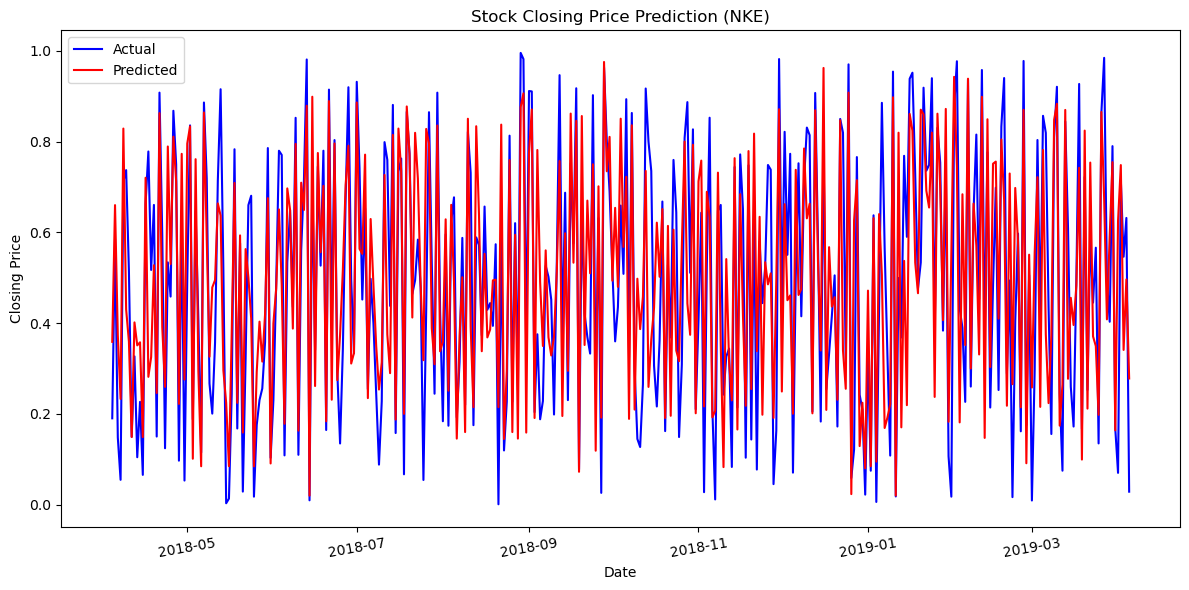

In [51]:
pyplot.figure(figsize=(12,6))
pyplot.plot(test_data.index, y_test, label='Actual', color='blue')
pyplot.plot(test_data.index, predictions, label='Predicted', color='red')
pyplot.xlabel('Date')
pyplot.ylabel('Closing Price')

pyplot.title('Stock Closing Price Prediction (NKE)')
pyplot.legend()
pyplot.xticks(rotation=10)
pyplot.tight_layout()
pyplot.show()

In [7]:
return_period = 5
Y = np.log(stk_data.loc[:, ('Close','NKE')]).diff(return_period).shift(-return_period)
Y.name = Y.name[-1]+'_pred'

In [43]:
X1 = np.log(stk_data.loc[:, ('Close',('GS', 'JNJ', 'PFE', 'JPM'))]).diff(return_period)
X1.columns = X1.columns.droplevel()
X2 = np.log(ccy_data).diff(return_period)
X3 = np.log(idx_data).diff(return_period)
X4 = pd.concat([np.log(stk_data.loc[:,('Close', 'NKE')]).diff(i) for i in [return_period, return_period*3, return_period*6, return_period*12]], axis=1).dropna()
X4.columns = ['NKE_DT', 'NKE_3DT', 'NKE_6DT', 'NKE_12DT']
X = pd.concat([X1, X2, X3, X4], axis=1)
dataset = pd.concat([Y, X], axis=1).dropna().iloc[::return_period, :]
Y =dataset.loc[:, Y.name]
X = dataset.loc[:, X.columns]

In [44]:
dataset.head()

,NKE_pred,GS,JNJ,PFE,JPM,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,NKE_DT,NKE_3DT,NKE_6DT,NKE_12DT
2014-04-02,-0.013235,0.033681,0.012085,0.003412,0.009636,0.014749,0.004096,0.020484,0.018514,-0.131524,0.017867,-0.057732,-0.003749,-0.038038
2014-05-09,0.006649,-0.010630,0.015983,-0.057560,-0.028654,-0.005880,-0.000949,-0.001415,0.004257,0.000774,0.006282,-0.007866,0.001771,-0.008946
2014-06-17,-0.001466,0.011119,-0.021066,-0.000678,-0.008325,-0.001858,0.012575,-0.004521,-0.008143,0.092908,-0.016117,-0.020040,0.024263,-0.001597
2014-07-24,-0.018879,0.035339,0.018068,-0.006898,0.022388,0.005120,-0.007217,0.015134,0.006282,-0.205420,0.026689,0.010359,0.045019,0.081061
2014-08-28,0.040040,0.014173,-0.011973,0.019245,0.011219,0.000000,-0.000603,0.002191,0.002349,0.024361,-0.001521,0.031839,0.029484,0.034724


<Axes: title={'center': 'Correlation Matrix'}>

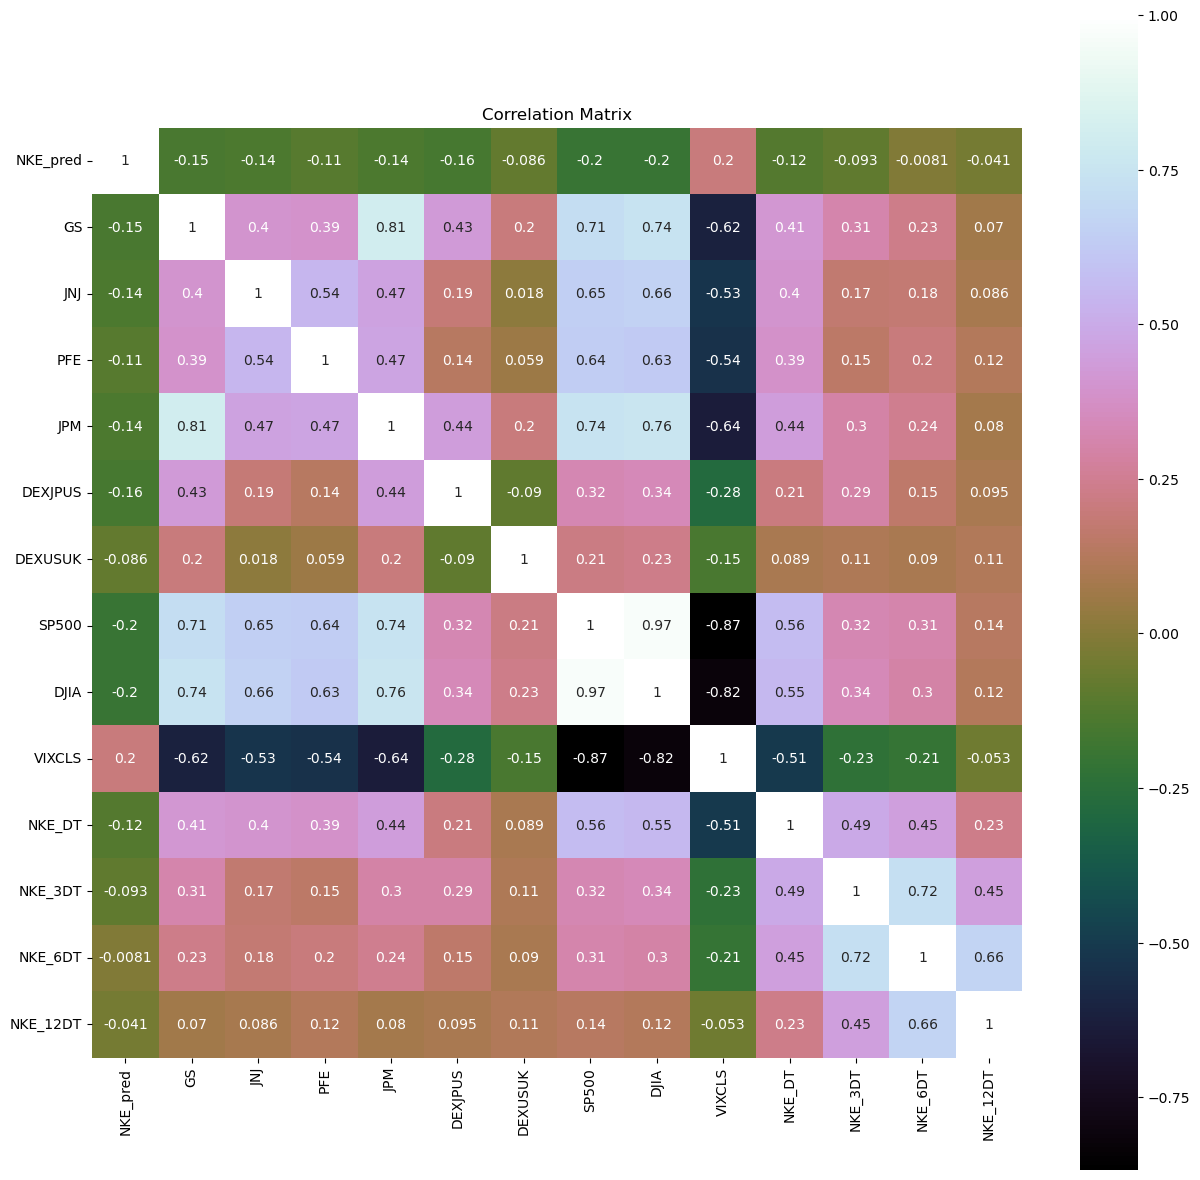

In [12]:
correlation = dataset.corr()
pyplot.figure(figsize=(15,15))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True, annot = True, cmap='cubehelix')

In [18]:
stk_data.head()

Price        Adj Close                                                  Close  \
Ticker              GS        JNJ        JPM        NKE       PFE          GS   
Date                                                                            
2009-04-06   90.748924  33.579369  19.450464  10.655690  7.365040  116.650002   
2009-04-07   90.305481  33.039017  18.795212  10.362641  7.257599  116.080002   
2009-04-08   89.270782  33.096912  18.919363  10.441619  7.241483  114.750000   
2009-04-09   96.723663  33.071175  22.588749  11.071360  7.279090  124.330002   
2009-04-13  101.251343  32.903919  23.243986  11.040182  7.241483  130.149994   

Price                                                 ...        Open  \
Ticker            JNJ        JPM      NKE        PFE  ...          GS   
Date                                                  ...               
2009-04-06  52.200001  28.200001  12.8175  13.007590  ...  116.000000   
2009-04-07  51.360001  27.250000  12.4650  12.817837  ...  114.000000   
2009-04-08  51.450001  27.430000  12.5600  12.789374  ...  117.370003   
2009-04-09  51.410000  32.750000  13.3175  12.855787  ...  119.790001   
2009-04-13  51.150002  33.700001  13.2800  12.789374  ...  122.809998   

Price                                                   Volume            \
Ticker            JNJ        JPM      NKE        PFE        GS       JNJ   
Date                                                                       
2009-04-06  52.029999  28.270000  12.8200  12.865275  21098100  12768700   
2009-04-07  51.889999  27.280001  12.5925  12.922201  22183000  13130100   
2009-04-08  51.540001  27.450001  12.4900  12.846300  20406200  10935000   
2009-04-09  51.990002  30.440001  12.8125  12.922201  25610700  15056300   
2009-04-13  51.270000  32.009998  13.1825  12.836812  36460800  12067200   

Price                                      
Ticker            JPM       NKE       PFE  
Date                                       
2009-04-06   72188000  11080000  62792893  
2009-04-07   73652600  11580000  52777680  
2009-04-08   66538300  13103200  44234799  
2009-04-09  147913000  18044400  57995612  
2009-04-13  110196200  13202000  44054249  

[5 rows x 30 columns]

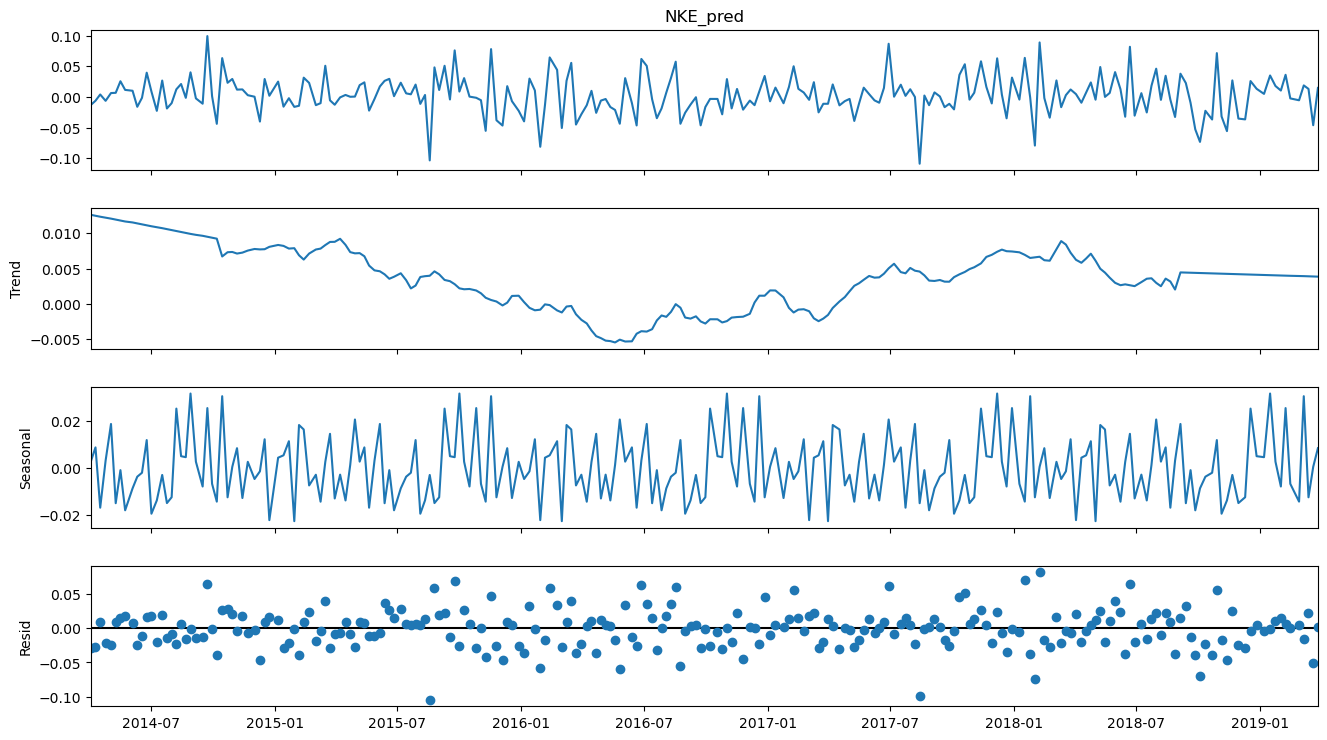

In [19]:
# 3.3 시계열 분석
res = sm.tsa.seasonal_decompose(Y,period=52, extrapolate_trend='freq')
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
pyplot.show()
#pyplot.savefig('time_series.pdf')

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 훈련 및 테스트 데이터 나누기
train_data = data[(data.index >= '2009-04-05') & (data.index <= '2017-04-03')]
test_data = data[(data.index >= '2018-04-04') & (data.index <= '2019-04-05')]

# 특성 선택: 새로운 변수들을 포함하여 훈련 데이터 및 테스트 데이터 선택
X_train = train_data[['H-L', 'O-C', '7 DAYS MA', '14 DAYS MA', '21 DAYS MA', '7 DAYS STD DEV']]
y_train = train_data['NKE_Close']

X_test = test_data[['H-L', 'O-C', '7 DAYS MA', '14 DAYS MA', '21 DAYS MA', '7 DAYS STD DEV']]
y_test = test_data['NKE_Close']



NameError: name 'data' is not defined

In [ ]:
# 5.1 훈련
validation_size = 0.2

# In case the data is not dependent on the time series, then train and test split randomly
# seed = 7
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)

# In case the data is dependent on the time series, then train and test split should be done based on sequential sample
# This can be done by selecting an arbitrary split point in the ordered list of observations and creating two new datasets.
train_size = int(len(X) * (1-validation_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

In [25]:
num_folds = 10
scoring = 'neg_mean_squared_error'

In [26]:
# 5.3 사이킷런 이용 머신러닝
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

models.append(('MLP', MLPRegressor()))

# Boosting methods
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
# Bagging methods
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

In [27]:
names = []
kfold_results = []
test_results = []
train_results = []
for name, model in models:
    names.append(name)
    
    ## K Fold analysis:
    
    kfold = KFold(n_splits=num_folds) # KFold(n_splits=num_folds, random_state=seed)
    # converted mean square error to positive. The lower the beter
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)
    

    # Full Training period
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result)
    
    # Test results
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result)
    
   # msg = "%5s: %f (%f) %f %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
   # print(msg)

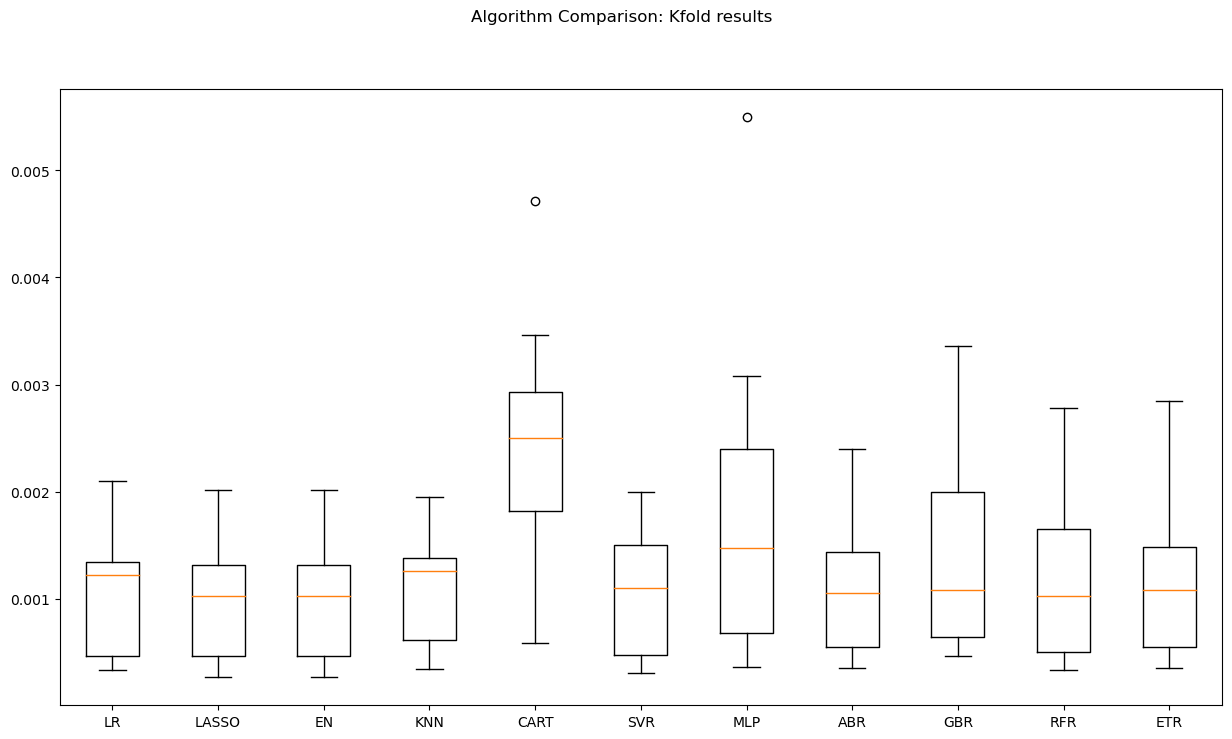

In [28]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison: Kfold results')
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
#pyplot.show()
pyplot.savefig('box.pdf')

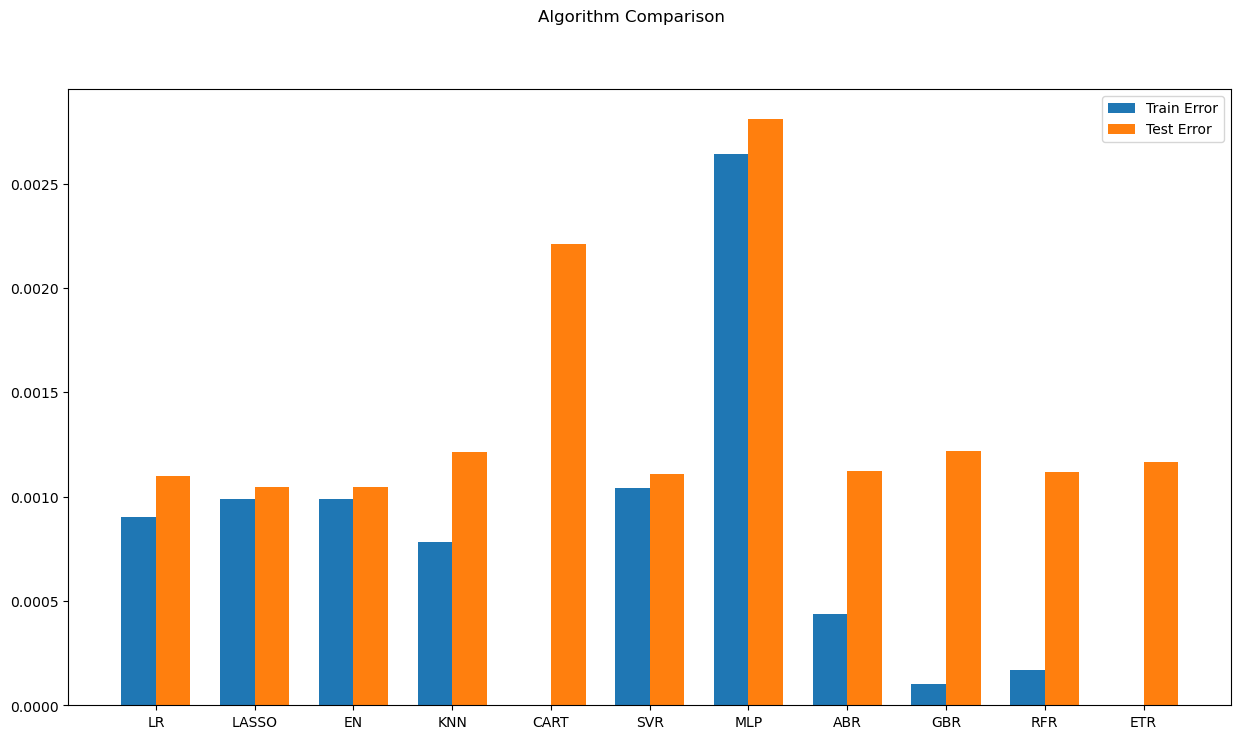

In [29]:
# compare algorithms
fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
# pyplot.show()
pyplot.savefig('compare.pdf')

In [32]:
# 결측값을 평균값으로 대체
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)




/var/folders/sp/mym89g410d75pchy52vhq7y80000gn/T/ipykernel_95712/2648382195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)
/var/folders/sp/mym89g410d75pchy52vhq7y80000gn/T/ipykernel_95712/2648382195.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(X_test.mean(), inplace=True)


In [35]:
# 랜덤 포레스트 회귀 모델 생성 및 학습
model = RandomForestRegressor(n_estimators=10, random_state=10)
model.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=10, random_state=10)

In [38]:
X_train_ARIMA=X_train.loc[:, [ 'GS', 'JNJ', 'PFE', 'JPM', 'DEXJPUS', 'SP500', 'DJIA', 'VIXCLS']]
X_test_ARIMA=X_test.loc[:, ['GS', 'JNJ', 'PFE', 'JPM', 'DEXJPUS', 'SP500', 'DJIA', 'VIXCLS']]
tr_len = len(X_train_ARIMA)
te_len = len(X_test_ARIMA)
to_len = len (X)

In [39]:
modelARIMA=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=[1,0,0])
model_fit = modelARIMA.fit()

/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [40]:
error_Training_ARIMA = mean_squared_error(Y_train, model_fit.fittedvalues)
predicted = model_fit.predict(start = tr_len -1 ,end = to_len -1, exog = X_test_ARIMA)[1:]
error_Test_ARIMA = mean_squared_error(Y_test,predicted)
error_Test_ARIMA

/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


0.0010516246448773448

In [41]:
seq_len = 2 # Length of the seq for the LSTM

Y_train_LSTM, Y_test_LSTM = np.array(Y_train)[seq_len-1:], np.array(Y_test)
X_train_LSTM = np.zeros((X_train.shape[0]+1-seq_len, seq_len, X_train.shape[1]))
X_test_LSTM = np.zeros((X_test.shape[0], seq_len, X.shape[1]))
for i in range(seq_len):
    X_train_LSTM[:, i, :] = np.array(X_train)[i:X_train.shape[0]+i+1-seq_len, :]
    X_test_LSTM[:, i, :] = np.array(X)[X_train.shape[0]+i-1:X.shape[0]+i+1-seq_len, :]


In [49]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.optimizers import SGD


In [53]:
# Lstm Network
def create_LSTMmodel(neurons=12, learn_rate = 0.01, momentum=0):
        # create model
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2])))
    #More number of cells can be added if needed 
    model.add(Dense(1))
    
    optimizer = SGD(learning_rate=learn_rate, momentum=momentum)

    model.compile(loss='mse', optimizer='adam')
    return model

LSTMModel = create_LSTMmodel(12, learn_rate=0.01, momentum=0.9)

LSTMModel_fit = LSTMModel.fit(X_train_LSTM, Y_train_LSTM, validation_data=(X_test_LSTM, Y_test_LSTM),epochs=330, batch_size=72, verbose=0, shuffle=False)

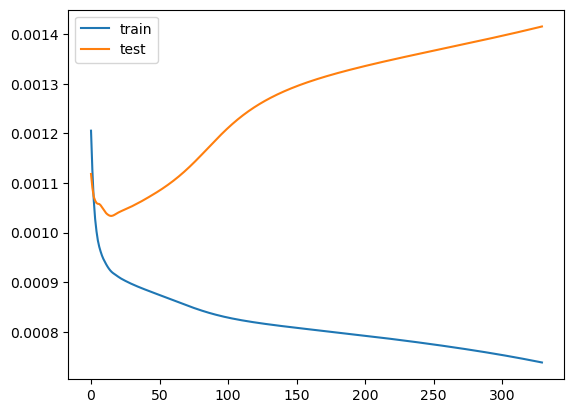

In [54]:
pyplot.plot(LSTMModel_fit.history['loss'], label='train')
pyplot.plot(LSTMModel_fit.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [55]:
error_Training_LSTM = mean_squared_error(Y_train_LSTM, LSTMModel.predict(X_train_LSTM))
predicted = LSTMModel.predict(X_test_LSTM)
error_Test_LSTM = mean_squared_error(Y_test,predicted)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [56]:
test_results.append(error_Test_ARIMA)
test_results.append(error_Test_LSTM)

train_results.append(error_Training_ARIMA)
train_results.append(error_Training_LSTM)

names.append("ARIMA")
names.append("LSTM")

In [57]:
def evaluate_arima_model(arima_order):
    #predicted = list()     
    modelARIMA=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=arima_order)
    model_fit = modelARIMA.fit()
    error = mean_squared_error(Y_train, model_fit.fittedvalues)
    return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(p_values, d_values, q_values): 
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)                
                try:
                    mse = evaluate_arima_model(order)                    
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.7f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.7f' % (best_cfg, best_score))
    

In [58]:
p_values = [0, 1, 2]
d_values = range(0, 2)
q_values = range(0, 2)

evaluate_models(p_values, d_values, q_values)   

/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0) MSE=0.0009216


/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1) MSE=0.0009216


/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0) MSE=0.0017453


/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

ARIMA(0, 1, 1) MSE=0.0009406
ARIMA(1, 0, 0) MSE=0.0009216


/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

ARIMA(1, 0, 1) MSE=0.0009000


/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dat

ARIMA(1, 1, 0) MSE=0.0014934


/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dat

ARIMA(1, 1, 1) MSE=0.0009538


/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dat

ARIMA(2, 0, 0) MSE=0.0008952


/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dat

ARIMA(2, 0, 1) MSE=0.0008888


/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dat

ARIMA(2, 1, 0) MSE=0.0011557
ARIMA(2, 1, 1) MSE=0.0009403
Best ARIMA(2, 0, 1) MSE=0.0008888


/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [59]:
modelARIMA_tuned=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=[2,0,1])
model_fit_tuned = modelARIMA_tuned.fit()

/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

In [60]:
predicted_tuned = model_fit.predict(start = tr_len -1 ,end = to_len -1, exog = X_test_ARIMA)[1:]
print(mean_squared_error(Y_test,predicted_tuned))

0.0010516246448773448


/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [17]:
# plotting the actual data versus predicted data
predicted_tuned.index = Y_test.index
pyplot.plot(np.exp(Y_test).cumprod(), 'r', label='actual') 

# plotting t, a separately 
pyplot.plot(np.exp(predicted_tuned).cumprod(), 'b--', label='predicted')
pyplot.legend()
pyplot.rcParams["figure.figsize"] = (8,5)
# pyplot.show()
pyplot.savefig('predict.pdf')

NameError: name 'Y_test' is not defined